In [26]:
#Handle all major imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#Load the PIMA Dataset
dataset = pd.read_csv('data/pima_diabetes_30_per.csv')

In [3]:
#Split the dataset
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean     95.265625   92.703341      81.212393      32.646477   64.770386   
std     193.478889   58.087772      31.224182      26.659120  103.382295   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       2.000000   12.778361      66.000000      12.000000    0.000000   
50%       5.000000  105.500000      76.000000      30.000000   21.836021   
75%      13.000000  132.000000      90.000000      47.000000   95.250000   
max     764.000000  199.000000     197.058113     102.984872  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    44.543222                  8.156643   25.473983    0.348958  
std     61.335732                 14.063232   17.047132    0.476951  
min      0.000000                  

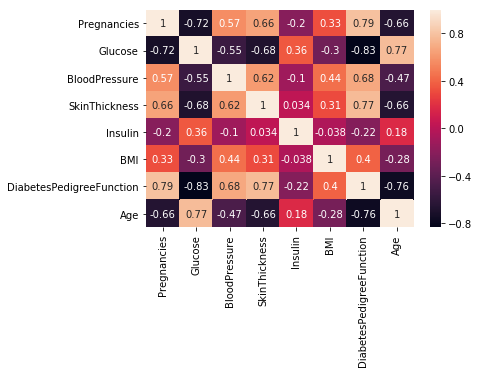

In [4]:
#View The Correlation matrix
sns.heatmap(X.corr(), annot = True)

In [5]:
#Feature Extraction
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies   Glucose  BloodPressure  SkinThickness    Insulin      BMI  \
0            1  3.971715     147.056372      70.956019  36.397967  2.99791   

   DiabetesPedigreeFunction       Age  
0                 36.632056  5.001434  
[  1.           3.97171468 147.0563721   70.95601876  36.39796742
   2.99790957  36.63205644   5.00143364]
   Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0            1    3.971715     147.056372      70.956019  36.397967   
1            1   85.000000      66.000000      29.000000   0.000000   
2            8  183.000000      64.000000       0.000000   0.000000   
3            4    1.400206      88.515605      67.593096  21.723057   
4            5    2.426937     137.130948      36.746923  33.618112   

          BMI        Age  
0    2.997910   5.001434  
1   26.600000  31.000000  
2   23.300000  32.000000  
3   93.492696   1.135593  
4  166.694499   1.852417  
[[  1.           3.97171468  36.39796742   2.99790957]
 [  1.      

In [6]:
#Splitting the dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [7]:
#Scaling the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#Implementing Gaussian NB Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [9]:
#Predicting the test Set results
y_pred = classifier.predict(X_test)

In [10]:
#Evaluating the Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[102   5]
 [ 34  13]]
0.4
0.7467532467532467


In [11]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[102   5]
 [ 34  13]]


In [12]:
#Calculating Model Accuracy from the Confusion Matrix
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7467532467532467
0.7467532467532467


In [13]:
#Calculating Classification Error from the Confusion Matrix
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.2532467532467532
0.2532467532467533


In [14]:
#Calculate Sensitivity from the Confusion Matrix
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.2765957446808511
0.2765957446808511


In [15]:
#Calculate Specificity from the Confusion Matrix
specificity = TN / (TN + FP)

print(specificity)

0.9532710280373832


In [16]:
#Calculate the False Positive Rate from the Confusion Matrix
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.04672897196261682
0.04672897196261683


In [17]:
#Calcualte Precision from the Confusion Matrix
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7222222222222222
0.7222222222222222


In [18]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [19]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.54208006, 0.45791994],
       [0.82589048, 0.17410952],
       [0.8657641 , 0.1342359 ],
       [0.42760248, 0.57239752],
       [0.81221526, 0.18778474],
       [0.86468219, 0.13531781],
       [0.26462449, 0.73537551],
       [0.40199216, 0.59800784],
       [0.5369215 , 0.4630785 ],
       [0.58226993, 0.41773007]])

In [20]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.45791994, 0.17410952, 0.1342359 , 0.57239752, 0.18778474,
       0.13531781, 0.73537551, 0.59800784, 0.4630785 , 0.41773007])

In [21]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

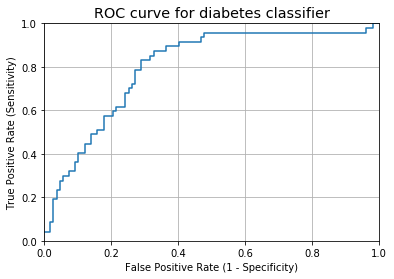

In [22]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [23]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.799164843905349


In [25]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

0.7136438746438746